# Problem Statement:
I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score 

In [2]:
df=sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [5]:
df.shape

(6366, 9)

In [6]:
#add "affair" column: 1 represents having affairs, 0represents not 
df['affair'] = (df.affairs >0).astype(int)

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [8]:
df.shape

(6366, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [10]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [11]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', df, return_type="dataframe")

In [12]:
# dummy variable creation for different categories of occupation
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [13]:
df1=[X,df['affair']]
whole_Data=pd.concat(df1,axis=1)

In [14]:
whole_Data

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0,0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0,0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0,0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0,0


In [15]:
y=df['affair']

In [16]:
#converting values into integer type
X=X.astype(np.int64)
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1,1,0,0,0,0,0,0,0,1,0,3,32,9,3,3,17
1,1,0,1,0,0,0,0,0,1,0,0,3,27,13,3,1,14
2,1,0,1,0,0,0,0,0,0,1,0,4,22,2,0,1,16
3,1,0,0,0,1,0,0,0,0,1,0,4,37,16,4,3,16
4,1,0,1,0,0,0,0,0,1,0,0,5,27,9,1,1,14


In [17]:
#converting values into integer type
y=y.astype(np.int64)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int64

# EDA

In [18]:
df['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

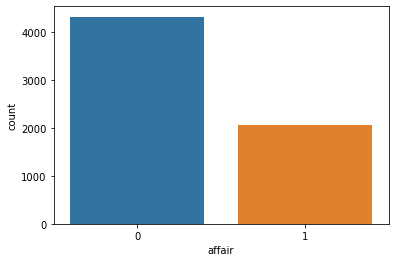

In [19]:
import seaborn as sns
sns.countplot(x=df["affair"])

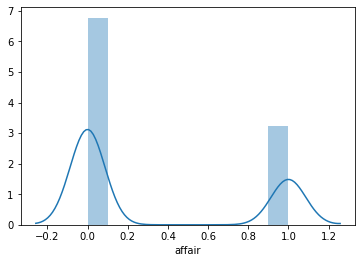

In [20]:
sns.distplot(df["affair"])

4313 womens are not having any affair
2053 womens are having affair

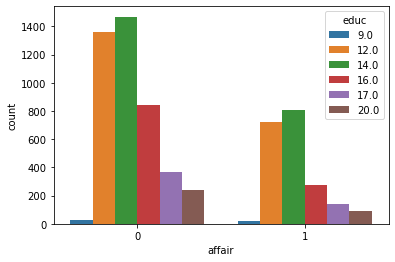

In [21]:
sns.countplot(x=df["affair"],hue=df['educ'])

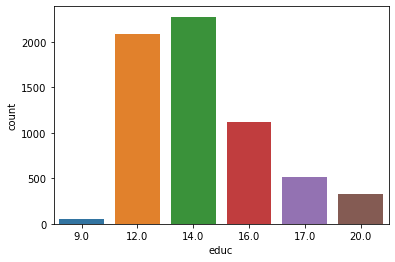

In [22]:
sns.countplot(x=df["educ"])

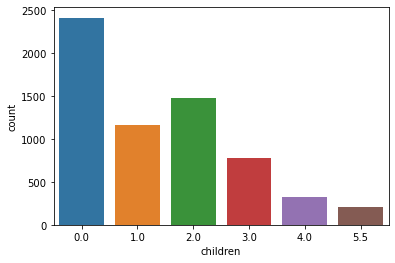

In [23]:
sns.countplot(x=df["children"])

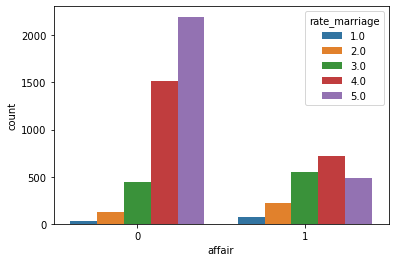

In [24]:
sns.countplot(x=df["affair"],hue=df['rate_marriage'])

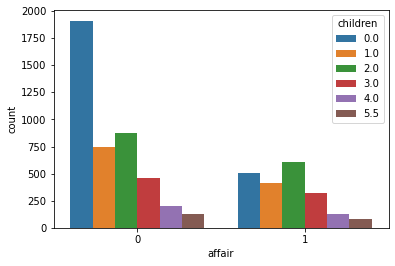

In [25]:
sns.countplot(x=df["affair"],hue=df['children'])

In [26]:
df.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

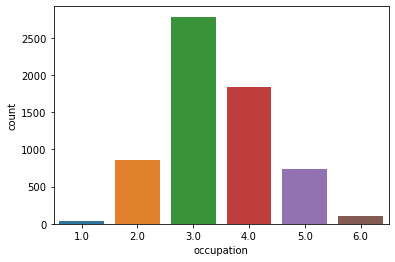

In [27]:
sns.countplot(x=df["occupation"])

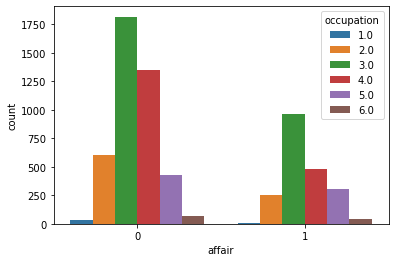

In [28]:
sns.countplot(x=df["affair"],hue=df['occupation'])

from above count plot we can say that womens having "white collar job"=3 are having more affair



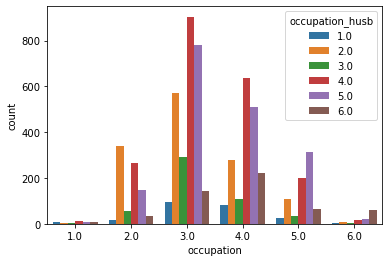

In [29]:
sns.countplot(x=df["occupation"],hue=df['occupation_husb'])

In [30]:
df['affair']

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int32

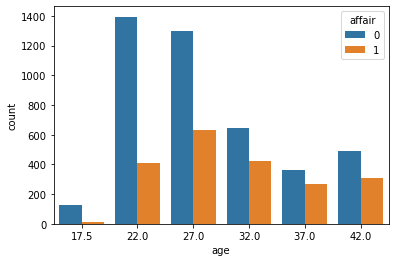

In [31]:
sns.countplot(x=df["age"],hue=df['affair'])

In [32]:
whole_Data.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1


In [33]:
whole_Data.corr()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affair
Intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occ_2,NaN,1.000000,-0.348075,-0.251243,-0.143237,-0.052128,0.183782,-0.020904,-0.009786,-0.093292,-0.059107,-0.019697,-0.034223,0.004668,0.081182,-0.013129,-0.217719,-0.024613
occ_3,NaN,-0.348075,1.000000,-0.560645,-0.319631,-0.116322,-0.000638,0.090043,0.011248,0.003021,-0.101673,-0.053082,-0.066371,-0.021261,-0.063298,-0.034986,-0.335615,0.045729
occ_4,NaN,-0.251243,-0.560645,1.000000,-0.230712,-0.083962,-0.083123,-0.043159,0.037341,-0.001946,0.085766,0.068882,0.040982,-0.026816,-0.003235,0.043996,0.477505,-0.082706
occ_5,NaN,-0.143237,-0.319631,-0.230712,1.000000,-0.047868,-0.053426,-0.044053,-0.039932,0.114903,0.006016,-0.002109,0.079533,0.076820,0.033274,0.004260,-0.022121,0.073766
occ_6,NaN,-0.052128,-0.116322,-0.083962,-0.047868,1.000000,-0.046140,-0.029028,-0.043541,-0.030926,0.218824,0.008878,0.030676,-0.004912,-0.026830,0.011784,0.226920,0.012559
occ_husb_2,NaN,0.183782,-0.000638,-0.083123,-0.053426,-0.046140,1.000000,-0.146849,-0.347951,-0.316693,-0.153248,-0.038992,-0.057368,-0.033451,0.001190,0.009990,-0.160756,0.003474
occ_husb_3,NaN,-0.020904,0.090043,-0.043159,-0.044053,-0.029028,-0.146849,1.000000,-0.197588,-0.179838,-0.087024,-0.022514,0.011610,0.008046,-0.005538,0.008170,-0.052723,0.018884
occ_husb_4,NaN,-0.009786,0.011248,0.037341,-0.039932,-0.043541,-0.347951,-0.197588,1.000000,-0.426115,-0.206198,0.003303,-0.048989,-0.031121,-0.008032,-0.008491,-0.031422,-0.011295
occ_husb_5,NaN,-0.093292,0.003021,-0.001946,0.114903,-0.030926,-0.316693,-0.179838,-0.426115,1.000000,-0.187674,0.003256,0.105525,0.092462,0.053965,-0.000063,0.042540,0.021181


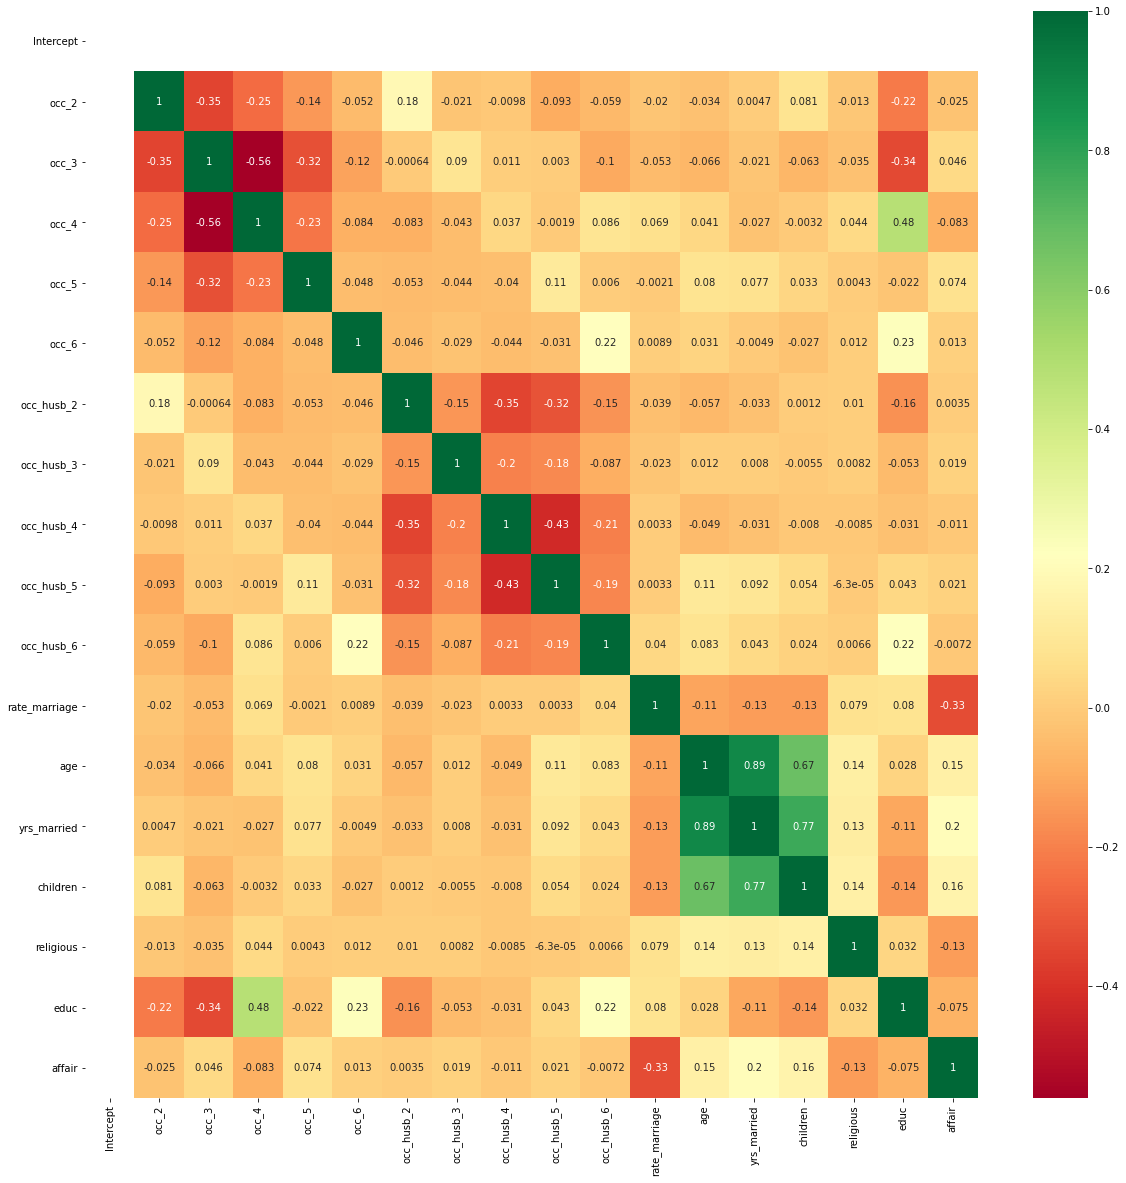

In [34]:
#get correlations of each features in dataset
corrmat = whole_Data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(whole_Data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

from above heat map we can say that age is coreleated with yrs_married so we can remove 1 column form our dataset


In [35]:
#drop age column
X=X.drop(['age'],axis=1)

In [36]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,children,religious,educ
0,1,1,0,0,0,0,0,0,0,1,0,3,9,3,3,17
1,1,0,1,0,0,0,0,0,1,0,0,3,13,3,1,14
2,1,0,1,0,0,0,0,0,0,1,0,4,2,0,1,16
3,1,0,0,0,1,0,0,0,0,1,0,4,16,4,3,16
4,1,0,1,0,0,0,0,0,1,0,0,5,9,1,1,14


In [120]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.35, random_state=150)  

In [121]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [122]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=475)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=475)

In [140]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(classifier,f)

In [141]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [142]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
conf_mat= confusion_matrix(y_test,y_pred)  

In [143]:
conf_mat

array([[1402,  133],
       [ 442,  252]], dtype=int64)

In [144]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [145]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)*100
Accuracy

74.20367877972186

In [146]:
# Precison
Precision = true_positive/(true_positive+false_positive)*100
Precision

91.33550488599349

In [147]:
# Recall
Recall = true_positive/(true_positive+false_negative)*100
Recall

76.03036876355749

In [148]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

82.9831311038769

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

Let's see how well our model performs on the test data set.

In [150]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7420367877972185

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

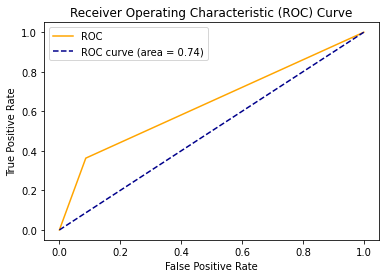

In [152]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % accuracy)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()